# Julia's EDA

## Loading data

In [36]:
import pandas as pd
import json

data_path = "../data/raw/1_csv/data_subchunk_100000_200000.csv"

# Load data
df = pd.read_csv(data_path)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   $insert_id            100000 non-null  object
 1   amplitude_id          100000 non-null  int64 
 2   app                   100000 non-null  int64 
 3   city                  98535 non-null   object
 4   client_event_time     100000 non-null  object
 5   client_upload_time    100000 non-null  object
 6   country               100000 non-null  object
 7   data                  100000 non-null  object
 8   data_type             100000 non-null  object
 9   device_family         100000 non-null  object
 10  device_id             100000 non-null  object
 11  device_type           81469 non-null   object
 12  dma                   80155 non-null   object
 13  event_id              100000 non-null  int64 
 14  event_properties      100000 non-null  object
 15  event_time        

In [37]:
df.head()

,$insert_id,amplitude_id,app,city,client_event_time,client_upload_time,country,data,data_type,device_family,...,os_version,platform,processed_time,region,server_received_time,server_upload_time,session_id,user_id,user_properties,uuid
0,ccb04252-a1ce-408a-b1a2-a3573ea4917d,864218414211,591532,Spring,2024-06-17 20:33:48.109000,2024-06-17 20:33:49.713000,United States,"{'path': '/2/httpapi', 'group_first_event': {}...",event,Mac OS X,...,119,Web,2024-06-17 20:33:49.895000,Texas,2024-06-17 20:33:49.713000,2024-06-17 20:33:49.717000,1718650922298,2db3ef42-46f0-4856-a55d-b202565c7090,"{'initial_utm_medium': 'EMPTY', 'initial_refer...",a4e18a7c-e721-407a-a507-4c0eaf4f45d4
1,b8759f20-fec3-4387-a4e2-00f82925115c,864218414211,591532,Spring,2024-06-17 20:33:48.111000,2024-06-17 20:33:49.713000,United States,"{'path': '/2/httpapi', 'group_first_event': {}...",event,Mac OS X,...,119,Web,2024-06-17 20:33:49.895000,Texas,2024-06-17 20:33:49.713000,2024-06-17 20:33:49.717000,1718650922298,2db3ef42-46f0-4856-a55d-b202565c7090,"{'initial_utm_medium': 'EMPTY', 'initial_refer...",8276821f-ade8-46a3-9496-5e4fd10c3aa5
2,b8c5ccb7-c60b-41fa-9319-ef980bc10975,864218414211,591532,Spring,2024-06-17 20:33:50.024000,2024-06-17 20:33:51.100000,United States,"{'path': '/2/httpapi', 'group_first_event': {}...",event,Mac OS X,...,119,Web,2024-06-17 20:33:51.438000,Texas,2024-06-17 20:33:51.100000,2024-06-17 20:33:51.103000,1718650922298,2db3ef42-46f0-4856-a55d-b202565c7090,"{'initial_utm_medium': 'EMPTY', 'initial_refer...",186d75e3-67c3-4806-96c9-17e73267fed4
3,6b6b6eb6-b80b-4549-8d68-d61d8850a10f,864218414211,591532,Spring,2024-06-17 20:34:01.488000,2024-06-17 20:34:02.649000,United States,"{'path': '/2/httpapi', 'group_first_event': {}...",event,Mac OS X,...,119,Web,2024-06-17 20:34:03.105000,Texas,2024-06-17 20:34:02.649000,2024-06-17 20:34:02.652000,1718650922298,2db3ef42-46f0-4856-a55d-b202565c7090,"{'initial_utm_medium': 'EMPTY', 'initial_refer...",872efa1a-62c2-4c0a-9b0a-ce7dcc68d63d
4,aa09273f-2938-44fd-ac62-40cfcbd2d130,864218414211,591532,Spring,2024-06-17 20:34:02.393000,2024-06-17 20:34:07.056000,United States,"{'path': '/2/httpapi', 'group_first_event': {}...",event,Mac OS X,...,119,Web,2024-06-17 20:34:08.587000,Texas,2024-06-17 20:34:07.056000,2024-06-17 20:34:07.059000,1718650922298,2db3ef42-46f0-4856-a55d-b202565c7090,"{'initial_utm_medium': 'EMPTY', 'initial_refer...",89e42a4c-f557-40a4-84eb-e21687be83de


In [38]:
df.columns

Index(['$insert_id', 'amplitude_id', 'app', 'city', 'client_event_time',
       'client_upload_time', 'country', 'data', 'data_type', 'device_family',
       'device_id', 'device_type', 'dma', 'event_id', 'event_properties',
       'event_time', 'event_type', 'language', 'library', 'os_name',
       'os_version', 'platform', 'processed_time', 'region',
       'server_received_time', 'server_upload_time', 'session_id', 'user_id',
       'user_properties', 'uuid'],
      dtype='object')

## Preprocessing/cleaning

In [39]:
# handle nested fields

import ast
# Convert stringified JSON fields to actual dictionaries
json_columns = ["event_properties", "user_properties", "data"]

for col in json_columns:
    df[col] = df[col].apply(lambda x: ast.literal_eval(x)  if isinstance(x, str) else {})

# Extract relevant keys into new columns
df["event_name"] = df["event_properties"].apply(lambda x: x.get("displayName", "Unknown"))
df["event_property_type"] = df["event_properties"].apply(lambda x: x.get("type", "Unknown"))
df["event_slug"] = df["event_properties"].apply(lambda x: x.get("slug", "Unknown"))
df["event_lob"] = df["event_properties"].apply(lambda x: x.get("line-of-business", "Unknown"))

df["user_role"] = df["user_properties"].apply(lambda x: x.get("roles", ["Unknown"])[0])
df["user_hostname"] = df["user_properties"].apply(lambda x: x.get("hostname", "Unknown"))

df.drop(columns=json_columns, inplace=True)


In [41]:
df = df.drop_duplicates()
print(df.isnull().sum())

$insert_id                  0
amplitude_id                0
app                         0
city                     1465
client_event_time           0
client_upload_time          0
country                     0
data_type                   0
device_family               0
device_id                   0
device_type             18531
dma                     19845
event_id                    0
event_time                  0
event_type                  0
language                    0
library                     0
os_name                     0
os_version                  0
platform                    0
processed_time              0
region                    237
server_received_time        0
server_upload_time          0
session_id                  0
user_id                   101
uuid                        0
event_name                  0
event_property_type         0
event_slug                  0
event_lob                   0
user_role                   0
user_hostname               0
dtype: int

In [42]:
# convert to datetime
time_columns = ["event_time", "client_event_time", "server_received_time"]

for col in time_columns:
    df[col] = pd.to_datetime(df[col])

# Extract time-based features
df["event_date"] = df["event_time"].dt.date
df["event_time_of_day"] = df["event_time"].dt.time
df["event_hour"] = df["event_time"].dt.hour
df["event_weekday"] = df["event_time"].dt.weekday

## Categorical data
I want to figure out what kind of entries are in the categorical columns. Plot some bar charts to see the distribution.

In [58]:
# Define the categorical columns to inspect
categorical_columns = ['event_name', 'event_type', 'event_slug', 'event_lob', 'event_property_type', 'user_hostname', 'user_role']

# Create a summary DataFrame
summary_df = pd.DataFrame(columns=['Total Entries', 'Non-Empty Entries', 'Empty Entries', 'Unique Categories'])

for col in categorical_columns:
    total_entries = df[col].shape[0]
    non_empty = df[col].notna().sum()
    empty = total_entries - non_empty
    unique_categories = df[col].nunique()

    summary_df.loc[col] = [total_entries, non_empty, empty, unique_categories]

summary_df

,Total Entries,Non-Empty Entries,Empty Entries,Unique Categories
event_name,100000,100000,0,254
event_type,100000,100000,0,192
event_slug,100000,100000,0,285
event_lob,100000,100000,0,22
event_property_type,100000,100000,0,4
user_hostname,100000,100000,0,16
user_role,100000,100000,0,12


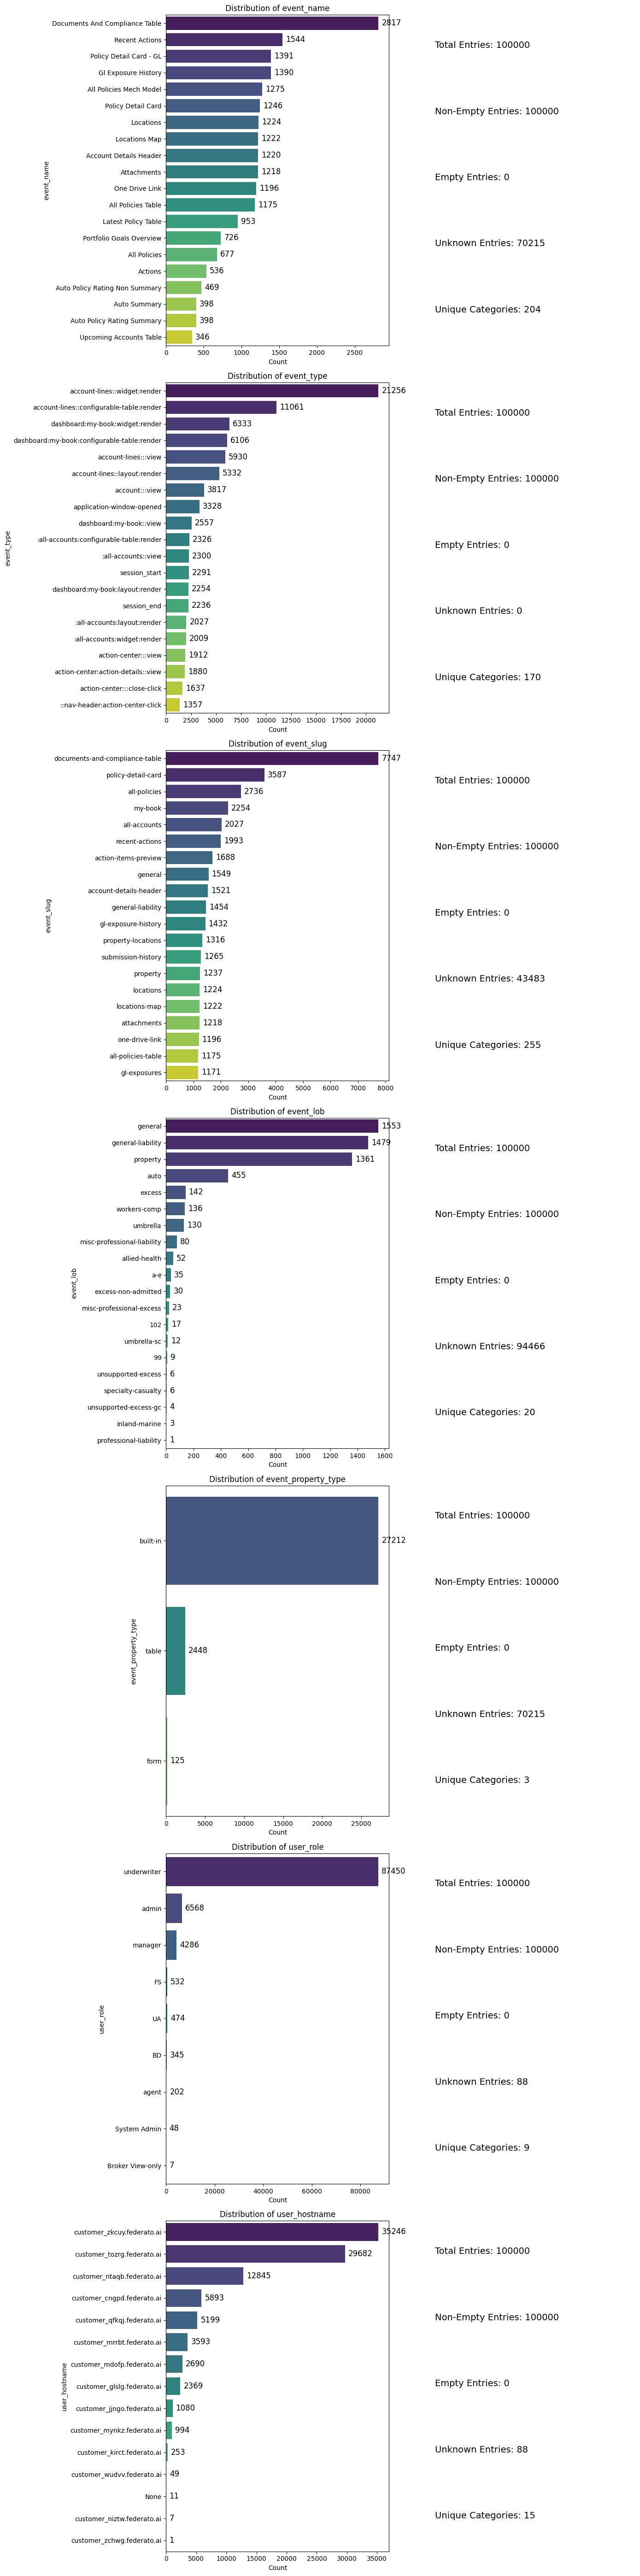

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare plots
fig, axes = plt.subplots(len(categorical_columns), 2, figsize=(14, len(categorical_columns) * 8))

# Loop through each column
for idx, col in enumerate(categorical_columns):
    filtered_col = df[df[col] != 'Unknown']
    
    # Count the number of unique categories and their frequencies
    category_counts = filtered_col[col].value_counts(dropna=False)

    # Number of unique categories
    unique_categories = category_counts.index.tolist()
    
    # Limit to top 20 categories if there are more than 20
    top_categories = category_counts.head(20)
    
    # Number of non-empty and empty entries
    total_entries = len(df[col])
    non_empty_entries = total_entries - category_counts.isnull().sum()
    empty_entries = category_counts.isnull().sum()
    unknown_entries = df[col].eq('Unknown').sum()

    # Plot bar chart for the categorical column (top 20 categories)
    barplot = sns.barplot(x=top_categories.values, y=top_categories.index, hue=top_categories.index, ax=axes[idx, 0], palette="viridis")
    axes[idx, 0].set_title(f"Distribution of {col}")
    axes[idx, 0].set_xlabel("Count")
    axes[idx, 0].set_ylabel(col)

    for bar in barplot.containers:
        axes[idx, 0].bar_label(bar, fmt='%d', label_type='edge', padding=5, fontsize=12)

    # Plot supporting information as text
    axes[idx, 1].axis('off')  # Turn off axes for the second plot
    axes[idx, 1].text(0.1, 0.9, f"Total Entries: {total_entries}", fontsize=14, ha='left')
    axes[idx, 1].text(0.1, 0.7, f"Non-Empty Entries: {non_empty_entries}", fontsize=14, ha='left')
    axes[idx, 1].text(0.1, 0.5, f"Empty Entries: {empty_entries}", fontsize=14, ha='left')
    axes[idx, 1].text(0.1, 0.3, f"Unknown Entries: {unknown_entries}", fontsize=14, ha='left')
    axes[idx, 1].text(0.1, 0.1, f"Unique Categories: {len(unique_categories)}", fontsize=14, ha='left')

# Show the plot
plt.tight_layout()
plt.show()


Note that for event_name, event_slug, and event_property_type a lot of the entries are 'Unknown'

## Daily Active Users

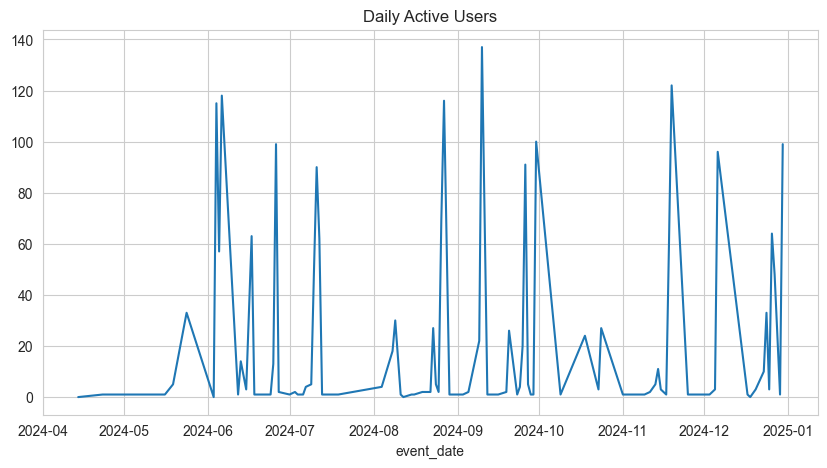

In [46]:
dau = df.groupby("event_date")["user_id"].nunique() # number of unique user ids per day

# Plot DAU
import matplotlib.pyplot as plt
dau.plot(title="Daily Active Users", figsize=(10, 5))
plt.show()


Not sure how this data is organized... if one chunk ranges from May to Dec what are all of the other chunks? The data isn't in chronological order. It would probably make more sense to run this using all the data available in order to extract meaningful observations.

In [28]:
date_range = (df["event_date"].min(), df["event_date"].max())
print("date range: ", date_range)
n_unique_dates = df["event_date"].nunique()
print("number of unique dates:", n_unique_dates)

date range:  (datetime.date(2024, 4, 23), datetime.date(2024, 12, 26))
number of unique dates: 107


## User Retention

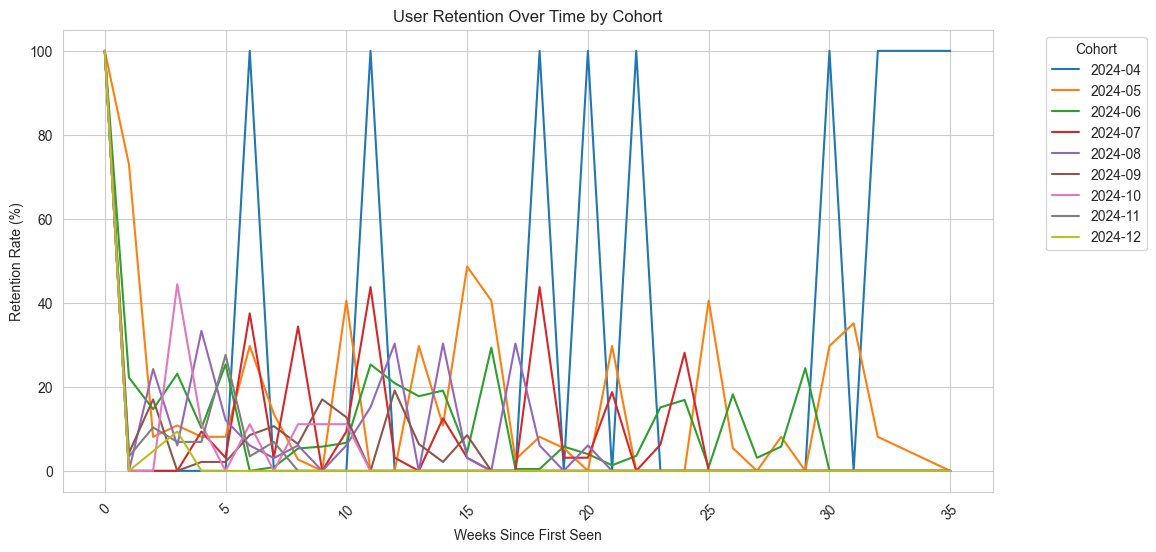

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Identify the first time each user appeared
df["first_seen"] = df.groupby("user_id")["event_time"].transform("min") # Finds the earliest event_time for each user and applies it to all rows for that user

# Assign each user to a cohort (signup month)
df["cohort"] = df["first_seen"].dt.to_period("M")  # Group by month
df["days_since_first_seen"] = (df["event_time"] - df["first_seen"]).dt.days
df["weeks_since_first_seen"] = df["days_since_first_seen"] // 7

retention = df.groupby(["cohort", "weeks_since_first_seen"])["user_id"].nunique().unstack(fill_value=0)

# Normalize by cohort size (convert to retention %)
cohort_sizes = retention.iloc[:, 0]  # First column is cohort size at Day 0
retention_rate = retention.div(cohort_sizes, axis=0) * 100  # Convert to percentage

# Step 5: Plot Retention Chart
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

for cohort in retention_rate.index:
    plt.plot(retention_rate.columns, retention_rate.loc[cohort], label=str(cohort))

plt.xlabel("Weeks Since First Seen")
plt.ylabel("Retention Rate (%)")
plt.title("User Retention Over Time by Cohort")
plt.legend(title="Cohort", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.show()


The graph is really spikey when plotted by week. The blur cohort also has periodic spikes. Let's see what it looks like if we plot months since first seen instead. 

In [44]:
df["months_since_first_seen"] = df["event_time"].dt.month - df["first_seen"].dt.month

retention = df.groupby(["cohort", "months_since_first_seen"])["user_id"].nunique().unstack(fill_value=0)

# Normalize by cohort size (convert to retention %)
cohort_sizes = retention.iloc[:, 0]  # First column is cohort size at Day 0
print(cohort_sizes)
retention_rate = retention.div(cohort_sizes, axis=0) * 100  # Convert to percentage
retention_rate

cohort
2024-04      1
2024-05     37
2024-06    225
2024-07     32
2024-08     33
2024-09     47
2024-10      9
2024-11     29
2024-12     64
Freq: M, Name: 0.0, dtype: int64


months_since_first_seen,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
cohort,,,,,,,,,
2024-04,100.0,0.000000,100.000000,100.000000,100.000000,100.000000,0.000000,100.000000,100.0
2024-05,100.0,83.783784,37.837838,62.162162,62.162162,29.729730,43.243243,48.648649,0.0
2024-06,100.0,38.222222,42.666667,45.333333,8.444444,29.777778,36.888889,0.000000,0.0
2024-07,100.0,40.625000,53.125000,18.750000,43.750000,40.625000,0.000000,0.000000,0.0
2024-08,100.0,57.575758,12.121212,36.363636,45.454545,0.000000,0.000000,0.000000,0.0
2024-09,100.0,8.510638,34.042553,31.914894,0.000000,0.000000,0.000000,0.000000,0.0
2024-10,100.0,55.555556,44.444444,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2024-11,100.0,41.379310,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2024-12,100.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


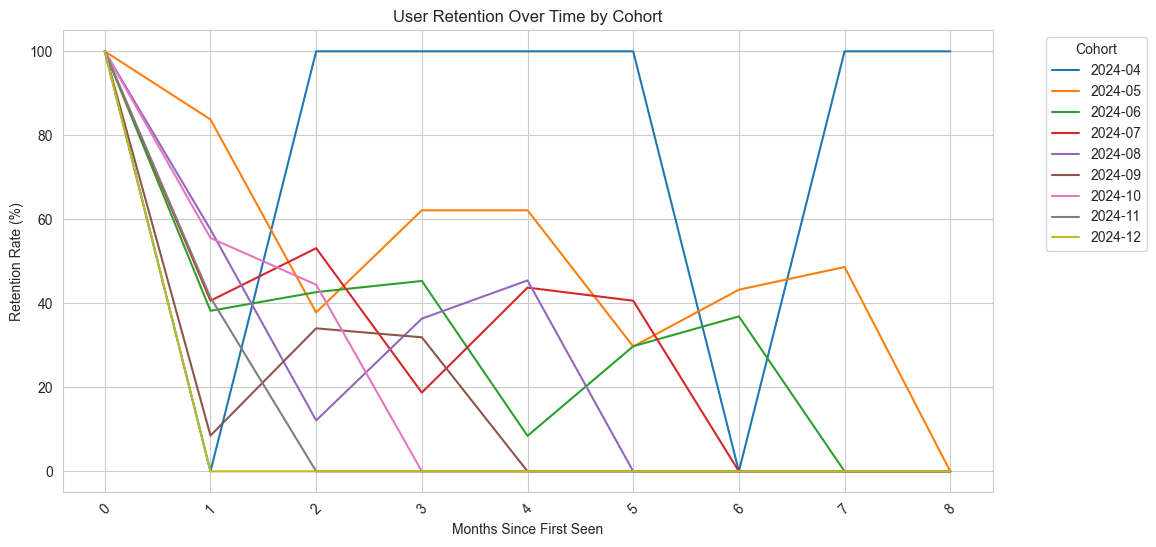

In [45]:

# Plot Retention Chart
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

for cohort in retention_rate.index:
    plt.plot(retention_rate.columns, retention_rate.loc[cohort], label=str(cohort))

plt.xlabel("Months Since First Seen")
plt.ylabel("Retention Rate (%)")
plt.title("User Retention Over Time by Cohort")
plt.legend(title="Cohort", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.show()

## Session lengths

In [59]:
session_times = df.groupby("session_id")["event_time"].agg(["min", "max"])
session_times["session_length"] = (session_times["max"] - session_times["min"]).dt.total_seconds()

session_times


,min,max,session_length
session_id,,,
1713056904397,2024-04-14 01:09:21.707,2024-04-14 01:09:21.707,0.000
1713877756240,2024-04-23 13:09:22.416,2024-04-23 13:09:22.416,0.000
1715823602127,2024-05-16 01:53:12.545,2024-05-16 01:53:12.545,0.000
1716141442857,2024-05-19 18:00:17.265,2024-05-19 18:00:25.599,8.334
1716142130492,2024-05-19 18:09:16.002,2024-05-19 18:09:16.002,0.000
...,...,...,...
1735592376535,2024-12-30 20:59:36.535,2024-12-30 20:59:36.536,0.001
1735592376537,2024-12-30 20:59:36.537,2024-12-30 20:59:36.538,0.001
1735592376550,2024-12-30 20:59:36.550,2024-12-30 20:59:36.551,0.001


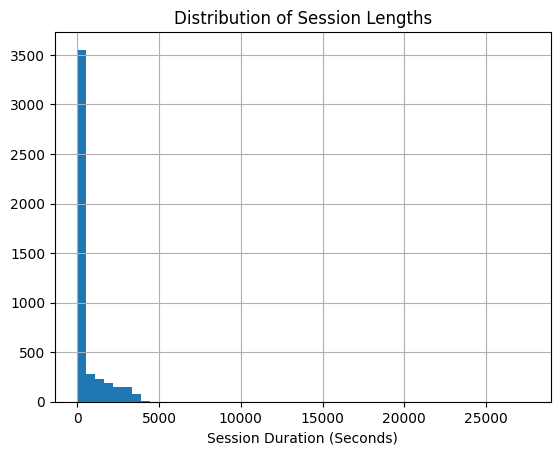

In [10]:
import matplotlib.pyplot as plt

# Plot histogram of session lengths
session_times["session_length"].hist(bins=50)
plt.title("Distribution of Session Lengths")
plt.xlabel("Session Duration (Seconds)")
plt.show()

In [15]:
print(session_times["session_length"].max())


27586.146


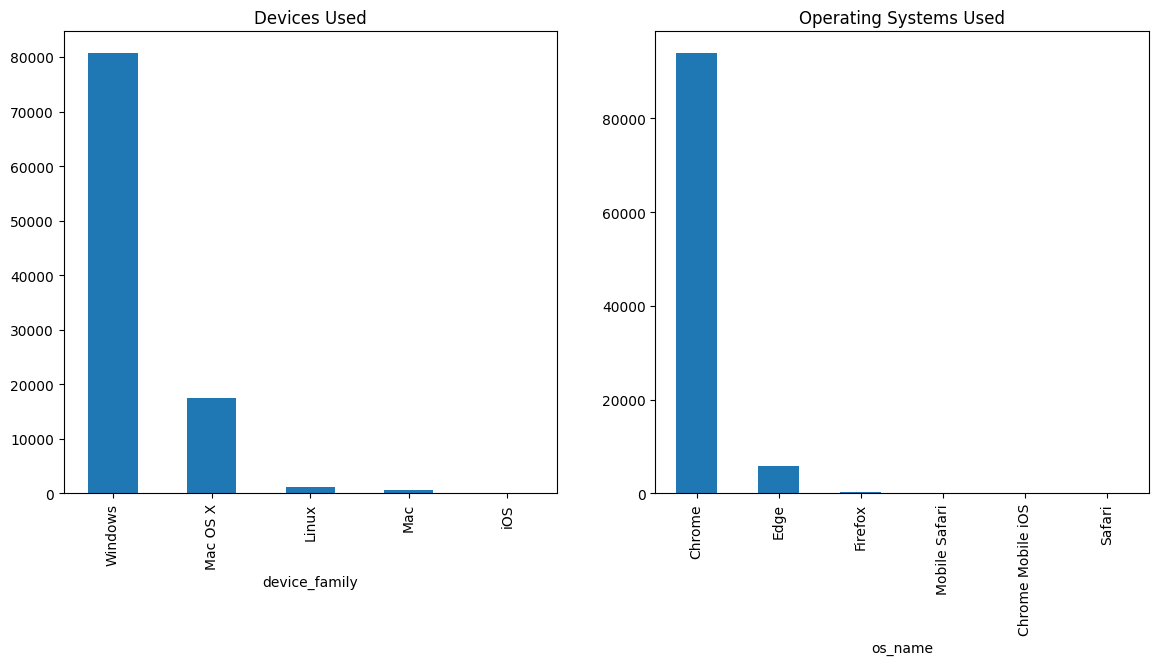

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
df["device_family"].value_counts().plot(kind="bar", title="Devices Used", ax=axes[0])
df["os_name"].value_counts().plot(kind="bar", title="Operating Systems Used", ax=axes[1])
plt.show()


In [51]:
df["session_length"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
99995   NaN
99996   NaN
99997   NaN
99998   NaN
99999   NaN
Name: session_length, Length: 100000, dtype: float64

In [50]:
# Create a sequence of actions for each session
df["event_sequence"] = df.groupby("session_id")["event_type"].transform(lambda x: " -> ".join(x))

# Find common sequences that lead to long sessions
long_sessions = df[df["session_length"] > 600]
# print(long_sessions.length)
# print(long_sessions["event_sequence"].value_counts().head(10))
long_sessions


,$insert_id,amplitude_id,app,city,client_event_time,client_upload_time,country,data_type,device_family,device_id,...,event_time_of_day,event_hour,event_weekday,first_seen,cohort,days_since_first_seen,weeks_since_first_seen,months_since_first_seen,event_sequence,session_length
